<div align="center">
  <h1>Using SciKit Learn</h1>
</div>

<div align="center">
  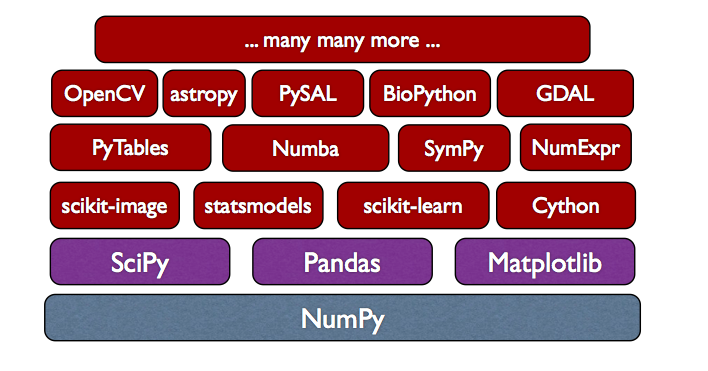
  [<i>Reference: http://quasiben.github.io/PyDataEMC/#/9</i>]<br><br>
</div>

<b>Numpy</b> adds Python support for large, multi-dimensional arrays and matrices, along with a large library of high-level mathematical functions to operate on these arrays.<br>
<b>SciPy</b> is a collection of mathematical algorithms and convenience functions built on the Numpy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data.<br>
<b>Pandas</b> is a software library written for data manipulation and analysis in Python. Offers data structures and operations for manipulating numerical tables and time series.<br>
<b>Scikit-learn</b> is a Python module for machine learning built on top of SciPy and distributed under the 3-Clause BSD license.

[<i>Reference: https://github.com/donnemartin/data-science-ipython-notebooks#scikit-learn</i>]

### Installing SciKit-Learn

If you already have a working installation of numpy and scipy, the easiest way to install scikit-learn is using pip:<br><br>
<div align="center">
 <i>pip install -U scikit-learn</i>
</div>
or conda:<br>
<div align="center">
 <i>conda install scikit-learn</i>
</div>
<br><b><font color='red'>Canopy and Anaconda both ship a recent version of scikit-learn, in addition to a large set of scientific python library for Win, Mac and Linux.</font></b>

[<i>Reference: https://github.com/donnemartin/data-science-ipython-notebooks#scikit-learn</i>]

### Training set and testing set

Machine learning is about learning some properties of a data set and applying them to new data. This is why a common practice in machine learning to evaluate an algorithm is to split the data at hand into two sets, one that we call the training set on which we learn data properties and one that we call the testing set on which we test these properties.

[<i>Reference: http://scikit-learn.org/stable/tutorial/basic/tutorial.html</i>]

### Linear Regression without Scikit-Learn library

Linear regression is a prediction method that is more than 200 years old.<br>

Simple linear regression is a great first machine learning algorithm to implement as it requires you to estimate properties from your training dataset, but is simple enough for beginners to understand.<br>

Linear regression assumes a linear or straight line relationship between the input variables (X) and the single output variable (y). More specifically, that output (y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression.

In [23]:
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]

The attribute x is the input variable and y is the output variable that we are trying to predict. If we got more data, we would only have x values and we would be interested in predicting y values.

Below is a simple scatter plot of x versus y.

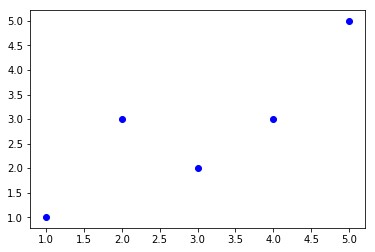

In [24]:
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
plt.scatter(x, y,  color='blue')
plt.show()

We can see the relationship between x and y looks kind of linear. As in, we could probably draw a line somewhere diagonally from the bottom left of the plot to the top right to generally describe the relationship between the data.

This is a good indication that using linear regression might be appropriate for this little dataset.
The line for a simple linear regression model can be written as:

<div align="center">
 <i>y = b0 + b1 * x</i>
</div>

where b0 and b1 are the coefficients we must estimate from the training data. Once the coefficients are known, we can use this equation to estimate output values for y given new input examples of x. It requires that you calculate statistical properties from the data such as mean, variance and covariance. All the algebra has been taken care of and we are left with some arithmetic to implement to estimate the simple linear regression coefficients. Briefly, we can estimate the coefficients as follows:

<div align="center">
 <i>B1 = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )</i><br>
 <i>B0 = mean(y) - B1 * mean(x)</i>
</div>

where the i refers to the value of the ith value of the input x or output y.


#### Calculate Mean and Variance

The first step is to estimate the mean and the variance of both the input and output variables from the training data.

In [25]:
# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))

In [26]:
mean_x, mean_y = mean(x), mean(y)

The variance is the sum squared difference for each value from the mean value.

In [27]:
# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])

In [28]:
var_x, var_y = variance(x, mean_x), variance(y, mean_y)

Running this example prints out the mean and variance for both columns.

In [29]:
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=3.000 variance=10.000
y stats: mean=2.800 variance=8.800


This is our first step, next we need to put these values to use in calculating the covariance.

#### Calculate Covariance

The covariance of two groups of numbers describes how those numbers change together.
Covariance is a generalization of correlation. Correlation describes the relationship between two groups of numbers, whereas covariance can describe the relationship between two or more groups of numbers.
Additionally, covariance can be normalized to produce a correlation value.
Nevertheless, we can calculate the covariance between two variables as follows:<br><br>

<div align="center">
 <i>covariance = sum((x(i) - mean(x)) * (y - mean(y)))</i>
</div>

In [30]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar / len(x)-1 # -1 is the bessel correction...

In [31]:
covar = covariance(x, mean_x, y, mean_y)

Running this example prints the covariance for the x and y variables.

In [32]:
print('Covariance: %.3f' % (covar))

Covariance: 8.000


We now have all the pieces in place to calculate the coefficients for our model.

#### Estimate Coefficients

We must estimate the values for two coefficients in simple linear regression.<br><br>

<div align="center">
 <i>B1 = covariance(x, y) / variance(x)</i><br>
 <i>B0 = mean(y) - B1 * mean(x)</i>
</div>

We can put all of this together into a function named coefficients() that takes the dataset as an argument and returns the coefficients.

In [33]:
def coefficients(dataset):
	x = [row[0] for row in dataset]
	y = [row[1] for row in dataset]
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]

Running this example calculates and prints the coefficients.

In [34]:
b0, b1 = coefficients(dataset)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))

Coefficients: B0=0.400, B1=0.800


#### Make Predictions

The simple linear regression model is a line defined by coefficients estimated from training data.
Once the coefficients are estimated, we can use them to make predictions.
The equation to make predictions with a simple linear regression model is as follows:<br><br>
<div align="center">
 <i>y = b0 + b1 * x</i>
</div>

Below is a function named simple_linear_regression() that implements the prediction equation to make predictions on a test dataset. It also ties together the estimation of the coefficients on training data from the steps above.
The coefficients prepared from the training data are used to make predictions on the test data, which are then returned.

In [35]:
def simple_linear_regression(train, test):
	predictions = list()
	b0, b1 = coefficients(train)
	for row in test:
		yhat = b0 + b1 * row[0]
		predictions.append(yhat)
	return predictions

In [36]:
test_set = list()
for row in dataset:
	row_copy = list(row)
	row_copy[-1] = None
	test_set.append(row_copy)
predicted = simple_linear_regression(dataset, test_set)
print("Prediction vales:", predicted)

Prediction vales: [1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]


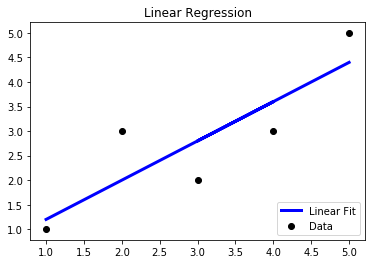

In [46]:
# Plot outputs
plt.scatter(x, y, color='black')
plt.plot(x, predicted, color='blue', linewidth=3)
plt.legend(('Linear Fit', 'Data'), loc='lower right')
plt.title('Linear Regression')
plt.show()

The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

#### Calculate root mean squared error

Below is a function to estimate the Root Mean Squared Error of the predictions called rmse_metric()

In [38]:
# Calculate root mean squared error
from math import sqrt
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)

In [39]:
actual = [row[-1] for row in dataset]
rmse = rmse_metric(actual, predicted)
print('RMSE: %.3f' % (rmse))

RMSE: 0.693


### Linear Regression with Scikit-Learn library

Coefficients: [[ 0.8]]
Mean squared error: 0.696
Explained Variance score: 0.73
Explained Variance score: 0.72


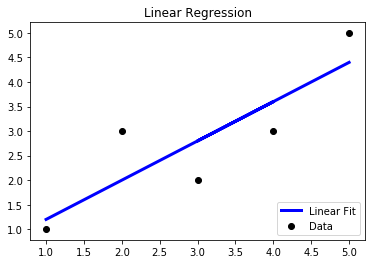

Prediction vales:

 [[ 1.2]
 [ 2. ]
 [ 3.6]
 [ 2.8]
 [ 4.4]]


In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score


dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
dataset_X_test = [row[0] for row in dataset]
dataset_Y_test = [row[1] for row in dataset]
dataset_X_test_matrix = np.transpose(np.matrix(dataset_X_test))
dataset_Y_test_matrix = np.transpose(np.matrix(dataset_Y_test))

regr = linear_model.LinearRegression()
regr.fit(dataset_X_test_matrix, dataset_Y_test_matrix)

# The coefficients
print('Coefficients:', regr.coef_)
# The mean squared error
print('Mean squared error: %.3f' % mean_squared_error(dataset_X_test, regr.predict(dataset_Y_test_matrix)))
# Explained variance score: 1 is perfect prediction
print('Explained Variance score: %.2f' % regr.score(dataset_X_test_matrix, dataset_Y_test_matrix)) # or
print('Explained Variance score: %.2f' % explained_variance_score(dataset_X_test_matrix, dataset_Y_test_matrix))

plt.scatter(dataset_X_test, dataset_Y_test,  color='black')
predicted = regr.predict(dataset_X_test_matrix)
plt.plot(dataset_X_test, predicted, color='blue', linewidth=3)
plt.legend(('Linear Fit', 'Data'), loc='lower right')
plt.title('Linear Regression')
plt.show()
print("Prediction vales:\n\n", predicted)

### sklearn.datasets: Datasets

The sklearn.datasets module includes utilities to load datasets, including methods to load and fetch popular reference datasets. It also features some artificial data generators.

[<i>Reference: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets</i>]

### Student task

Calculate the coefficients, the residual sum of squares and the variance score for the "Diabetes" dataset from the scikit-learn library. Use only the first feature of the Diabetes dataset, in order to illustrate a two-dimensional plot of this regression technique. 

<i>Getting only one feature of the dataset => 

diabetes = datasets.load_diabetes() <br>
diabetes_X = diabetes.data[:, np.newaxis, 2]</i>

Scikit-Learn Diabetes dataset => http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


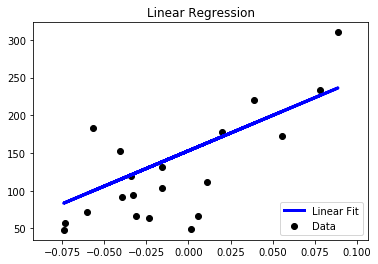

In [50]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.legend(('Linear Fit', 'Data'), loc='lower right')
plt.title('Linear Regression')
plt.show()

#Reference => http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

### Principal Component Analysis (PCA)

Principal Components Analysis (PCA) is a way of identifying patterns in data, and expressing the data in such a way as to highlight their similarities and differences. Since patterns in data can be hard to find in data of high dimension, where the luxury of graphical representation is not available, PCA is a powerful tool for analysing data.

The other main advantage of PCA is that once you have found these patterns in the data, and you compress the data, ie. by reducing the number of dimensions, without much loss of information

<i>[Reference: http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf]</i>

#### PCA and Dimensionality Reduction

Often, the desired goal is to reduce the dimensions of a <b>d</b>-dimensional dataset by projecting it onto a <b>(k)</b>-dimensional subspace (where <b>k</b> < <b>d</b> ) in order to increase the computational efficiency while retaining most of the information. An important question is "what is the size of <b>k</b> that represents the data 'well'?"